**Atonia Andall
816009278
Comp3610
Assignment 3**

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.decomposition import PCA

%matplotlib inline

### Part A

In [2]:
df = pd.read_csv('creditcard_approval.csv', header=None)

In [3]:
df.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
df.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [6]:
obj = df.dtypes[df.dtypes=="object"].index
df[obj].describe()

,0,1,3,4,5,6,8,9,11,12,13,15
count,690,690,690,690,690,690,690,690,690,690,690,690
unique,3,350,4,4,15,10,2,2,2,3,171,2
top,b,?,u,g,c,v,t,f,f,g,00000,-
freq,468,12,519,519,137,399,361,395,374,625,132,383


In [7]:
df[1].describe()

count     690
unique    350
top         ?
freq       12
Name: 1, dtype: object

Column 1 seems to be float values that have had question marks fill blank spaces.  We can do a mean of other values and replace those question marks

In [8]:
df[1]=df[1].replace('?', np.nan)
df[1]=df[1].astype(float)
df[1].fillna(df[1].mean(), inplace=True)

In [9]:
df[1].describe()

count    690.000000
mean      31.568171
std       11.853273
min       13.750000
25%       22.670000
50%       28.625000
75%       37.707500
max       80.250000
Name: 1, dtype: float64

The rest of values seem to be categorical.  Although column 13 contains numbers, the pattern of the numbers suggest some sort categorical numeric code.  Multiple columns seem to have their null values replaced with question marks.  Let's fix that

In [10]:
obj = df.dtypes[df.dtypes=="object"].index
df[obj].describe()

,0,3,4,5,6,8,9,11,12,13,15
count,690,690,690,690,690,690,690,690,690,690,690
unique,3,4,4,15,10,2,2,2,3,171,2
top,b,u,g,c,v,t,f,f,g,00000,-
freq,468,519,519,137,399,361,395,374,625,132,383


In [11]:
for i in obj:
    df[i]=df[i].replace('?', np.nan)
    df[i].fillna(df[i].mode()[0], inplace=True)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [13]:
for i in obj:
    print(i,":  ",df[i].unique())

0 :   ['b' 'a']
3 :   ['u' 'y' 'l']
4 :   ['g' 'p' 'gg']
5 :   ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j']
6 :   ['v' 'h' 'bb' 'ff' 'j' 'z' 'o' 'dd' 'n']
8 :   ['t' 'f']
9 :   ['t' 'f']
11 :   ['f' 't']
12 :   ['g' 's' 'p']
13 :   ['00202' '00043' '00280' '00100' '00120' '00360' '00164' '00080' '00180'
 '00052' '00128' '00260' '00000' '00320' '00396' '00096' '00200' '00300'
 '00145' '00500' '00168' '00434' '00583' '00030' '00240' '00070' '00455'
 '00311' '00216' '00491' '00400' '00239' '00160' '00711' '00250' '00520'
 '00515' '00420' '00980' '00443' '00140' '00094' '00368' '00288' '00928'
 '00188' '00112' '00171' '00268' '00167' '00075' '00152' '00176' '00329'
 '00212' '00410' '00274' '00375' '00408' '00350' '00204' '00040' '00181'
 '00399' '00440' '00093' '00060' '00395' '00393' '00021' '00029' '00102'
 '00431' '00370' '00024' '00020' '00129' '00510' '00195' '00144' '00380'
 '00049' '00050' '00381' '00150' '00117' '00056' '00211' '00230' '00156'
 '00022' '00228' '0051

In [14]:
for i in obj:
    df[i] = df[i].astype('category')
    df[i] = df[i].cat.codes
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,68,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,11,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,96,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,31,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,37,0,0


In [15]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.568171,4.758725,1.233333,0.475362,5.698551,5.098551,2.223406,0.523188,0.427536,2.40000,0.457971,0.176812,56.189855,1017.385507,0.555072
std,0.460464,11.853273,4.978163,0.430063,0.850238,4.285748,2.510731,3.346513,0.499824,0.495080,4.86294,0.498592,0.557869,46.386934,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,17.000000,0.000000,0.000000
50%,1.000000,28.625000,2.750000,1.000000,0.000000,5.000000,7.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,52.000000,5.000000,1.000000
75%,1.000000,37.707500,7.207500,1.000000,0.000000,10.000000,7.000000,2.625000,1.000000,1.000000,3.00000,1.000000,0.000000,93.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,2.000000,2.000000,13.000000,8.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2.000000,169.000000,100000.000000,1.000000


We can divide the data now based on class label

In [16]:
target=df[15]
inputs=df.drop(15, axis=1)

Looking at our head, we see that or standard deviation is not uniform across attributes.  Therefore, some parameters may cause a skew in any models created.  Let's fix this through use of standard scalar

In [17]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs = scaler.transform(inputs)

Column 13 structure suggests that the values are categorical rather than numerical.  Either way, that column has a lot of unique categories.  We can drop the column.  There may be many other columns which do not offer any significant value to the model.  We can use PCA to get only the impactful data.

In [18]:
pca = PCA(0.95)
pca.fit(inputs)
inputs=pca.transform(inputs)
inputs = pd.DataFrame(inputs)

In [19]:
inputs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.623090,-0.823947,0.138742,-1.469730,0.522156,-0.787099,0.489035,1.348800,-0.629507,0.674844,-0.542570,-0.772243,-0.088839
1,2.455738,0.201728,-0.819103,0.433322,-1.635971,-0.765872,0.567461,0.890554,0.411852,1.361368,-0.869048,0.076806,-0.697612
2,-0.224132,-1.139609,-0.193743,-0.714327,-1.832426,-0.138763,0.457984,0.718912,0.317936,0.538272,0.539266,-1.293623,0.502901
3,1.436655,-0.314695,0.785283,-1.448288,0.727741,-0.991715,0.568349,-0.187167,-0.291082,-0.356062,-1.243415,-0.272482,0.290213
4,-0.503984,-1.497370,0.517443,0.667418,1.544917,-0.454838,2.427126,1.589683,1.416639,-0.987502,0.196912,-1.036446,-0.132408


In [20]:
x = inputs.values
y = target.values
x_train, x_test, y_train, y_test = train_test_split(x,y)

### Part B

#### Section 1

##### KNN Classifier

In [21]:
neighbors = filter(lambda x: x % 2 != 0, list(range(1,100)))
cv_scores = {}
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores[k] = scores.mean()
bess_k = max(cv_scores, key=lambda k: cv_scores[k])

knn = KNeighborsClassifier(n_neighbors=bess_k)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

acc_knn = round(accuracy_score(y_test,pred) * 100, 2)
f1_knn = round(f1_score(y_test,pred)*100, 2)
prec_knn = round(precision_score(y_test,pred)*100, 2)
rec_knn = round(recall_score(y_test,pred)*100, 2)
roc_knn = round(roc_auc_score(y_test,pred)*100,2)

print("Accuracy:", acc_knn)
print("F1 Score:", f1_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("ROC AUC Score:", roc_knn)


Accuracy: 89.02
F1 Score: 90.64
Precision: 86.79
Recall: 94.85
ROC AUC Score: 88.21


Text(0, 0.5, 'True Positive Rate')

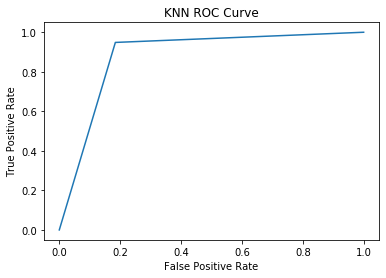

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.title("KNN ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

##### Random Forest Classifier

In [23]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)

acc_rf = round(accuracy_score(y_test,pred) * 100, 2)
f1_rf = round(f1_score(y_test,pred)*100, 2)
prec_rf = round(precision_score(y_test,pred)*100, 2)
rec_rf = round(recall_score(y_test,pred)*100, 2)
roc_rf = round(roc_auc_score(y_test,pred)*100,2)

print("Accuracy:", acc_rf)
print("F1 Score:", f1_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("ROC AUC Score:", roc_rf)


Accuracy: 88.44
F1 Score: 89.9
Precision: 88.12
Recall: 91.75
ROC AUC Score: 87.98


Text(0, 0.5, 'True Positive Rate')

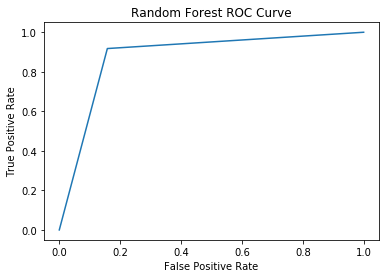

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.title("Random Forest ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

##### Decision Tree

In [25]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
pred = decision_tree.predict(x_test)

acc_dt = round(accuracy_score(y_test,pred) * 100, 2)
f1_dt = round(f1_score(y_test,pred)*100, 2)
prec_dt = round(precision_score(y_test,pred)*100, 2)
rec_dt = round(recall_score(y_test,pred)*100, 2)
roc_dt = round(roc_auc_score(y_test,pred)*100,2)

print("Accuracy:", acc_dt)
print("F1 Score:", f1_dt)
print("Precision:", prec_dt)
print("Recall:", rec_dt)
print("ROC AUC Score:", roc_dt)

Accuracy: 82.66
F1 Score: 85.58
Precision: 80.18
Recall: 91.75
ROC AUC Score: 81.4


Text(0, 0.5, 'True Positive Rate')

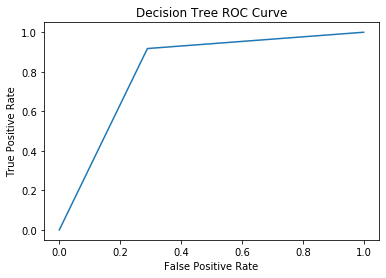

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.title("Decision Tree ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

#####  Logistic Regression

In [27]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
pred = logreg.predict(x_test)

acc_lr = round(accuracy_score(y_test,pred) * 100, 2)
f1_lr = round(f1_score(y_test,pred)*100, 2)
prec_lr = round(precision_score(y_test,pred)*100, 2)
rec_lr = round(recall_score(y_test,pred)*100, 2)
roc_lr = round(roc_auc_score(y_test,pred)*100,2)

print("Accuracy:", acc_lr)
print("F1 Score:", f1_lr)
print("Precision:", prec_lr)
print("Recall:", rec_lr)
print("ROC AUC Score:", roc_lr)

Accuracy: 89.6
F1 Score: 90.91
Precision: 89.11
Recall: 92.78
ROC AUC Score: 89.15


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'True Positive Rate')

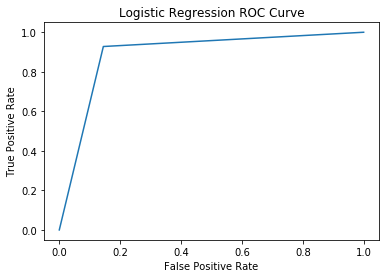

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.title("Logistic Regression ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

##### Gaussian Naive Bayes

In [29]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
pred = gaussian.predict(x_test)


acc_nb = round(accuracy_score(y_test,pred) * 100, 2)
f1_nb = round(f1_score(y_test,pred)*100, 2)
prec_nb = round(precision_score(y_test,pred)*100, 2)
rec_nb = round(recall_score(y_test,pred)*100, 2)
roc_nb = round(roc_auc_score(y_test,pred)*100,2)

print("Accuracy:", acc_nb)
print("F1 Score:", f1_nb)
print("Precision:", prec_nb)
print("Recall:", rec_nb)
print("ROC AUC Score:", roc_nb)

Accuracy: 86.13
F1 Score: 88.57
Precision: 82.3
Recall: 95.88
ROC AUC Score: 84.78


Text(0, 0.5, 'True Positive Rate')

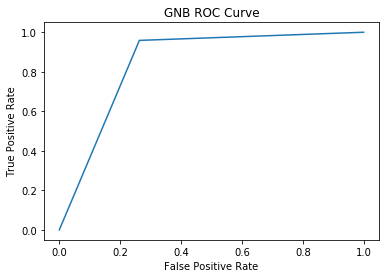

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.title("GNB ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [31]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Accuracy Score': [acc_knn, acc_lr, acc_rf, 
             acc_nb, acc_dt],
    'Precision': [prec_knn, prec_lr, prec_rf, 
             prec_nb, prec_dt],
    'Recall': [rec_knn, rec_lr, rec_rf, 
             rec_nb, rec_dt],
    'F1 Score': [f1_knn, f1_lr, f1_rf, 
             f1_nb, f1_dt],
    'Roc AUC Score': [roc_knn, roc_lr, roc_rf, 
             roc_nb, roc_dt]
})

models

,Model,Accuracy Score,Precision,Recall,F1 Score,Roc AUC Score
0,KNN,89.02,86.79,94.85,90.64,88.21
1,Logistic Regression,89.60,89.11,92.78,90.91,89.15
2,Random Forest,88.44,88.12,91.75,89.90,87.98
3,Naive Bayes,86.13,82.30,95.88,88.57,84.78
4,Decision Tree,82.66,80.18,91.75,85.58,81.40


In [32]:
data= models.melt('Model', var_name="Metric", value_name="Score" )

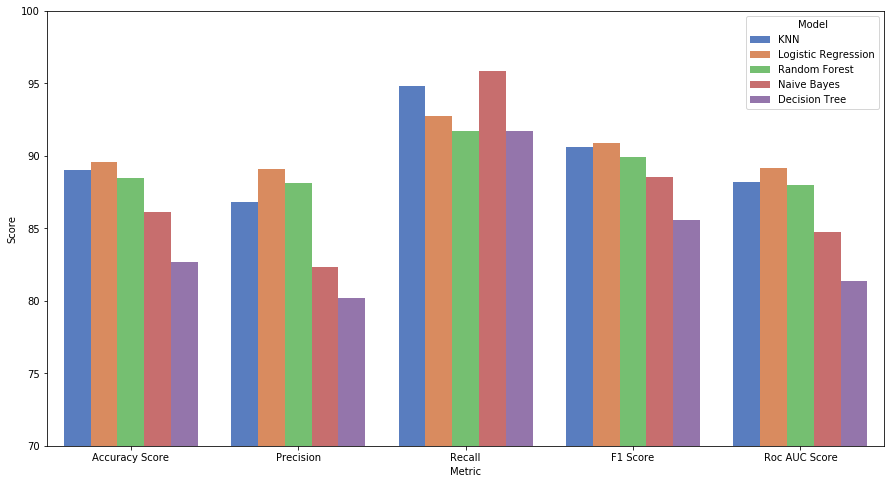

In [33]:
plt.figure(figsize=(15,8))
plt.ylim(70, 100)
sns.barplot(x="Metric", y="Score", hue="Model", data=data, palette="muted")

In terms of **accuracy**, no model performed terribly but no model performed exceptionally.  Logistic Regression performed the best with approximately 89% accuracy while Decision Tree perfomed the worst at approximately 82% accuracy.  Accuracy is often affected by imbalanced data and so may not be the best metric to evaluate our models on.

In terms of **precision** (the ratio of how many predictions were truly positive in all positive predictions), logistic regression performed the best at approximately 89% accuracy.  This means using this model, 11% of persons who were approved by the model when they should not have been.  Although the model did not perform terribly, it's acceptability in this case would be determined by the risk policy of the UCI.  They run the risk of approving persons for loans,credit cards etc when these persons may or may not honor their debt.  Random Forest Classifier also performed well at 88%. On the opposite end of the scale, Decision Tree again performed the worst at 80%.  In terms of precision, this model would be unacceptable.

**Recall** shows a model's ability to find all positive samples. Naive Bayes performed the best here while Decision Tree and Random Forest performed the worst.  At 95%, Naive Bayes model would have missed 5% of persons who should have been approved for credit but were not.  Although potential revenue would be lost by the UCI by not approving these persons for credit, precision is more important than recall in this case.  All models performed better than 90% in this metric

**F1 Score** considers both the recall and the precision of th emodel and can be useful in finding a balance between the two.  Logistic Regression performed the best here at approximately 90%.  If the UCI wishes to balance both their risk in giving out loans/credit cards etc to potential returns, this score would be most useful. Again, Decision Tree performed badly at 85%.

The **ROC AUC Score** also considers multiple parameters in giving a score.  Mainly in terms of true positive and false negative.  Like the other metrics, the closer to 50% the score is, the more random it is while the closer percent to 100% it is, the more useful it is.  In the metric, Logistic Regression performed the best at approximately 89%  Decision Tree again performed the worst at 81%.

The **ROC AUC Curves** of the various metrics reflect this analysis.  The further away the curve falls from the line y=x, the less random it is.  A test that falls to the top of the graph will be a perfect test.  The greater the area under the plotted line, the better the test performed.

We can see that the KNN, Random Forest Classifier and the Logistic Regression Classifier were among the top performing as they had the most area under their curves.  Decision tree had the least area and so performed the worst.

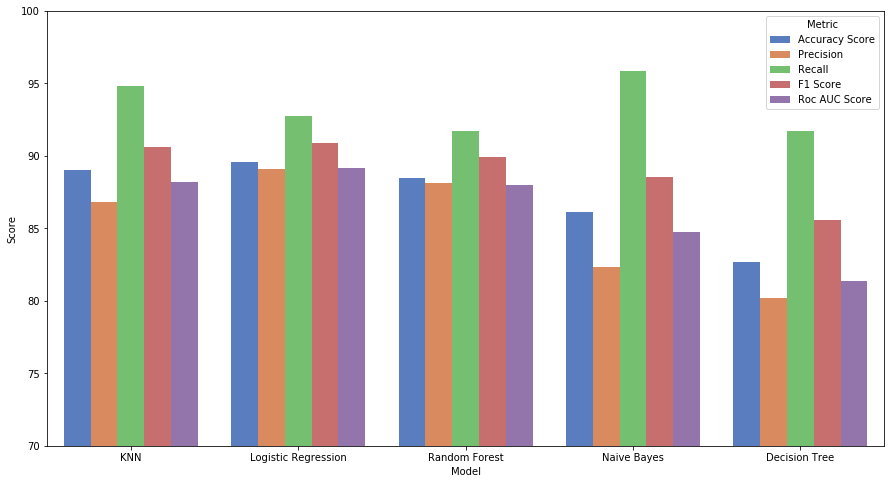

In [34]:
plt.figure(figsize=(15,8))
plt.ylim(70, 100)
sns.barplot(x="Model", y="Score", hue="Metric", data=data, palette="muted")

The best performing model across the board was the Logistic Regression Model as it consistently scored amongst the highest scores and did not score below 88% in any metric.  I would recommend that model in this case.  If the UCI values precision over other metrics, Linear Regression offers around 90% precision and would be a good model.  As Decision Tree consistently performed the least optimally, it should not be used.

#### Section 2

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features=['auto', 'sqrt']
max_depth=[int(x) for x in np.linspace(5, 100, num = 6)]
min_samples_split=[2, 5, 10, 15]
min_samples_leaf=[1, 2, 4]
bootstrap = [True, False]

# creating random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

random_forest = RandomForestClassifier()

In [37]:
clf = RandomizedSearchCV(random_forest, random_grid, n_iter=100, cv=5)

In [38]:
clf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [39]:
clf.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 62,
 'bootstrap': True}

In [40]:
#Recall 
pred = clf.predict(x_test)
round(recall_score(y_test,pred)*100, 2)

92.78

### Part 3

In [66]:

df1=df.drop(15, axis=1)


#normalize data for plotting the model
scaler = StandardScaler()
scaler.fit(df1)
df2 = scaler.transform(df1)

#remove noise
pca = PCA()
df2= pca.fit_transform(df2)
df2= pd.DataFrame(df2)

In [67]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.623090,-0.823947,0.138742,-1.469730,0.522156,-0.787099,0.489035,1.348800,-0.629507,0.674844,-0.542570,-0.772243,-0.088839,-0.469345,0.052033
1,2.455738,0.201728,-0.819103,0.433322,-1.635971,-0.765872,0.567461,0.890554,0.411852,1.361368,-0.869048,0.076806,-0.697612,-0.148782,0.049689
2,-0.224132,-1.139609,-0.193743,-0.714327,-1.832426,-0.138763,0.457984,0.718912,0.317936,0.538272,0.539266,-1.293623,0.502901,0.846190,0.001815
3,1.436655,-0.314695,0.785283,-1.448288,0.727741,-0.991715,0.568349,-0.187167,-0.291082,-0.356062,-1.243415,-0.272482,0.290213,-0.010771,0.029205
4,-0.503984,-1.497370,0.517443,0.667418,1.544917,-0.454838,2.427126,1.589683,1.416639,-0.987502,0.196912,-1.036446,-0.132408,0.287693,-0.033407


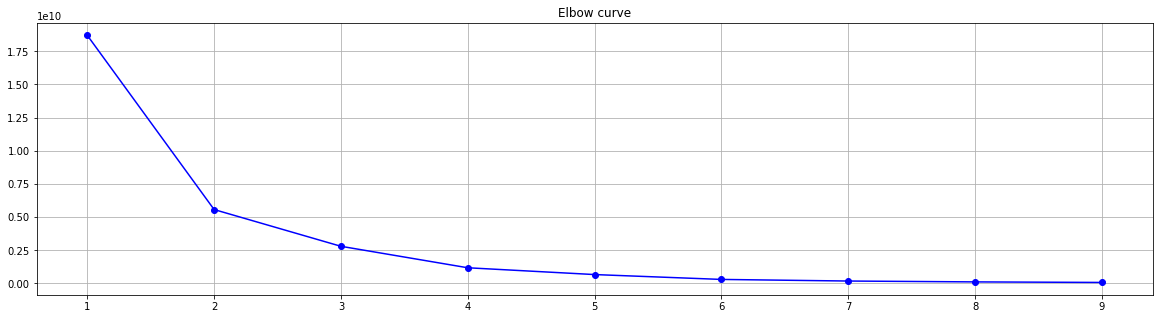

In [68]:
distortions = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df1)
    distortions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(20,5))
plt.plot(range(1,10), distortions, 'bo-')
plt.grid(True)
plt.title('Elbow curve')
plt.show()

We test for the best kmeans results using different number of clusters.  From the graph, we see we have the most reduction in variance between n=2 and n=3.  The slope becomes more constant afterwards.  We will use n_clusters=3

In [69]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
z = kmeans.cluster_centers_
labels=kmeans.labels_

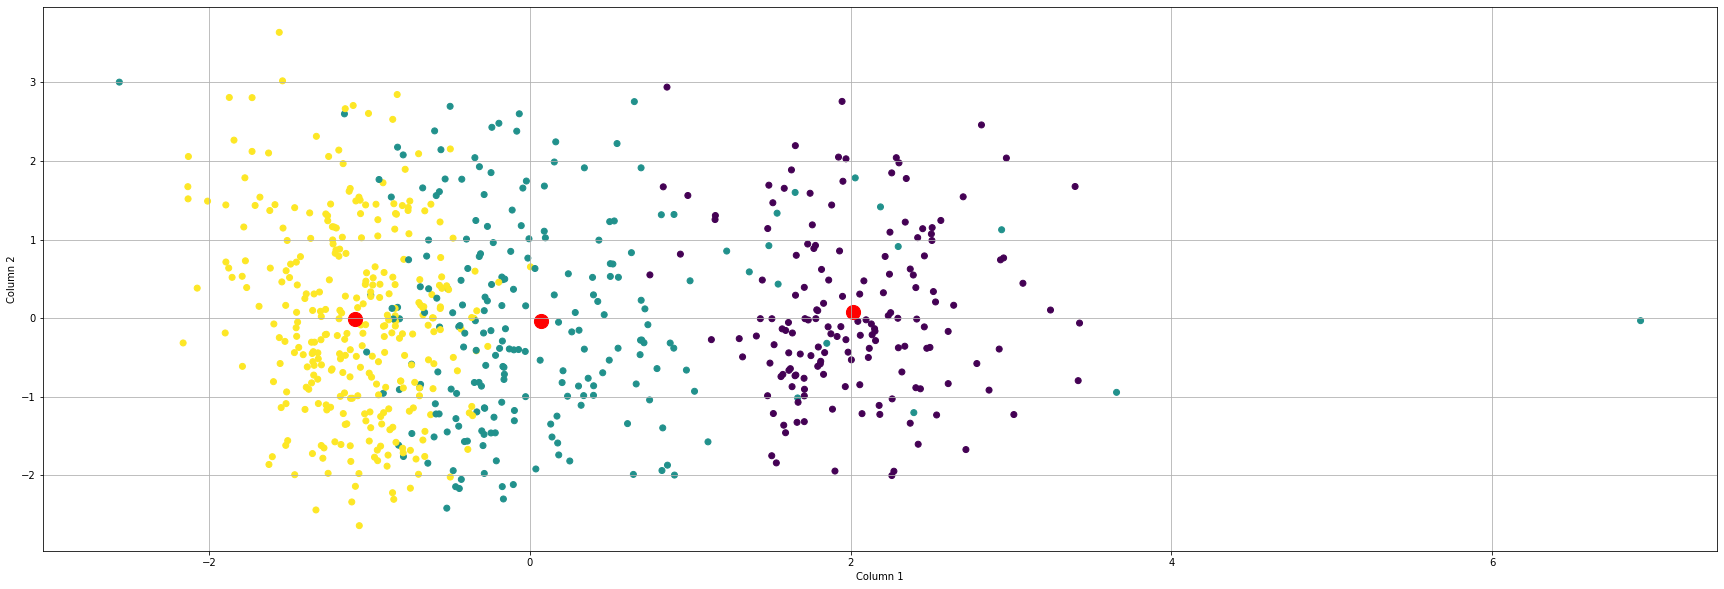

In [71]:
plt.figure(figsize=(30,10))
plt.grid(True)
plt.scatter(x =df2[1] ,y =df2[2] , c = labels)
plt.scatter(x = z[:,1], y =z[:,2], c='red', s=200)
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.show()